<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Distance_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


In [0]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")
direc = "/content/gdrive/My Drive/Colab Notebooks/CAPSTONE/"

Mounted at /content/gdrive


In [0]:
#!pip install import_ipynb
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import importlib
import nltk
import matplotlib.pyplot as plt
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
#pasting all utterances into lists
property_ = "speaking"
file1 = open(direc+"gables_{}_list.txt".format(property_), "r")
file2 = open(direc+"avonlea_{}_list.txt".format(property_), "r")
file3 = open(direc+"island_{}_list.txt".format(property_), "r")
file4 = open(direc+"poplars_{}_list.txt".format(property_), "r")
file5 = open(direc+"dreams_{}_list.txt".format(property_), "r")
file6 = open(direc+"ingleside_{}_list.txt".format(property_), "r")
file7 = open(direc+"rainbow_{}_list.txt".format(property_), "r")
file8 = open(direc+"rilla_{}_list.txt".format(property_), "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets_pre = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

#we have saved it in line by line formats in the file, so we need to extract it here
for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets_pre[s].append(files[s][i])
  # file.close()

In [0]:
#labeling book & character
from gensim.utils import simple_preprocess
book_character_labels = []
#contains tuples of character and book labels

for i in range(len(targets_pre)):
  for e in targets_pre[i]:
    in_labs = False
    for n in e.split(",")[1::2]:
      if (n, i) in book_character_labels:
        in_labs = n
    if in_labs==False:
      character_name_lengths = np.array([len(n) for n in e.split(",")[1::2]])
      book_character_labels.append((i, e.split(",")[np.argmax(character_name_lengths)*2+1]))
    else:
      book_character_labels.append((i, in_labs))

# book_character_labels = [(character_labels[e], book_labels[e]) for e in range(len(character_labels))]

sentences_flattened = []
for i in sentences:
  for e in i:
    sentences_flattened.append(simple_preprocess(e[0]))
    #after we have labelled the sentences, there is no longer a need to 
    #keep them in book lists, we keep it simply as a full list of utterances

In [0]:
def find_vector_for_character(characters_as_vectors, names, book = "all"):
  anne_vectors_lda = []
  if book=="all":
    for i in range(len(character_documents.keys())):
      if names[0] in list(character_documents.keys())[i][1] or names[1] in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
    #     print('ok')
          if book_character_labels.count(list(character_documents.keys())[i])>5:
            anne_vectors_lda.append(characters_as_vectors[i])
    return anne_vectors_lda
  else:
    for i in range(len(character_documents.keys())):
      if names[0] in list(character_documents.keys())[i][1] or names[1] in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
    #     print('ok')
          if book==list(character_documents.keys())[i][0]:
            if book_character_labels.count(list(character_documents.keys())[i])>5:
              anne_vectors_lda.append(characters_as_vectors[i])
              break
    return np.array(anne_vectors_lda)
    #getting the vector for a CBB from the trained lda model


In [0]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc]))
    return texts_out

In [0]:
character_documents = {}

for i in range(len(sentences_flattened)):
  a = character_documents.get(book_character_labels[i], [])
  a.append("\n")
  a.extend(sentences_flattened[i])
  character_documents[book_character_labels[i]] = a
  
anne_characters = []
anne_vectors = []
for i in range(len(character_documents.keys())):
  if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
#     print('ok')
      if book_character_labels.count(list(character_documents.keys())[i])>5:
        anne_characters.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents.values()))]

# Representing characters (Doc2Vec)

In [0]:
#this cell is used to train the doc2vec model,
#but we reuse character_documents and and anne_characters elsewhere
from nltk.tokenize import sent_tokenize
from gensim.test.utils import common_texts
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import random
import timeit

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

def train_doc2vec(randomise=False):
  if randomise==False:
    model_d2v = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
  else:
    model_d2v = Doc2Vec(random.sample(documents, len(documents)), vector_size=300, window=3, min_count=1, workers=4, dm = 1)
  characters_as_vectors = np.array([model_d2v.infer_vector(i) for i in list(character_documents.values())])

  anne_vectors = []
  for i in range(len(character_documents.keys())):
    if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
  #     print('ok')
        if book_character_labels.count(list(character_documents.keys())[i])>5:
          anne_vectors.append(characters_as_vectors[i])
  return anne_vectors, characters_as_vectors

anne_vectors, characters_as_vectors = train_doc2vec()
        

In [0]:
def train_lda(randomise=False):
  start = timeit.default_timer()
  if randomise==False:
    processed_docs = [i[0] for i in documents]
    processed_docs  = [i.split() for i in lemmatization(processed_docs)]#change the corpus to bag of words
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  else:
    processed_docs = [i[0] for i in random.sample(documents, len(documents))]
    processed_docs  = [i.split() for i in lemmatization(processed_docs)]#change the corpus to bag of words
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  # tfidf = models.TfidfModel(bow_corpus)
  # corpus_tfidf = tfidf[bow_corpus]
  #convert bow to tfidf
  # coherences = []
  # for n in [5, 10, 20, 30, 40, 50]:
  #   lda_model= LdaModel(corpus=bow_corpus, num_topics=n, id2word=dictionary, minimum_probability=0.0)
  #   cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
  #   coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
  #   coherences.append(coherence)
  # lda_model= LdaModel(corpus=bow_corpus, num_topics=[5, 10, 20, 30, 40, 50][np.argmax(coherences)], id2word=dictionary, minimum_probability=0.0)
  lda_model= LdaModel(corpus=bow_corpus, num_topics=50, id2word=dictionary, minimum_probability=0.0)
  # cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
  # coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
  # coherence_by_topic = cm.get_coherence_per_topic()
  # np.exp((coherence_by_topic/2)*N*(N-1))
  # plt.hist(coherence_by_topic)
  # plt.show()
  # for idx, topic in lda_model.print_topics(-1):
  #   print('Topic: {} Word: {}'.format(idx, topic))
  characters_as_vectors_lda = [[e[1] for e in lda_model[i]] for i in bow_corpus]
  anne_vectors_lda = find_vector_for_character(characters_as_vectors_lda, ["Anne", "Miss Blythe"])
  return anne_vectors_lda, characters_as_vectors_lda

# start = timeit.default_timer()
# anne_vectors_lda, characters_as_vectors_lda = train_lda()
# stop = timeit.default_timer()

# Cosine similarity (Doc2Vec)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

def cosine_d2v(anne_vectors):
  cosine_similarities = np.zeros((len(anne_vectors), len(anne_vectors)))
  for i in range(len(anne_vectors)):
    for e in range(len(anne_vectors)):
      cosine_similarities[i][e] = float(cosine(anne_vectors[i].reshape(1, -1), anne_vectors[e].reshape(1, -1)))

  d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
  return d

0.9900941848754883
0.976150631904602
0.9875559210777283
0.9729911088943481
0.9908325672149658


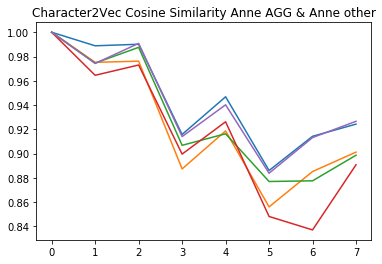

In [86]:
for i in range(5):
  anne_vectors, characters_as_vectors = train_doc2vec()
  d = cosine_lda(anne_vectors)
  plt.plot(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
  plt.title("Character2Vec Cosine Similarity Anne AGG & Anne other")
plt.show()

# Cosine similarity Latent Dirichlet Allocation

In [0]:
def cosine_lda(anne_vectors_lda):
  anne_vectors_lda = [np.array(i) for i in anne_vectors_lda]
  from sklearn.metrics.pairwise import cosine_similarity as cosine
  cosine_similarities = np.zeros((len(anne_vectors_lda), len(anne_vectors_lda)))
  for i in range(len(anne_vectors_lda)):
    for e in range(len(anne_vectors_lda)):
      try:
         cosine_similarities[i][e] = float(cosine(anne_vectors_lda[i].reshape(1, -1), anne_vectors_lda[e].reshape(1, -1)))
      except:
        print(i, e)
  d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
  return d
d = cosine_lda(anne_vectors_lda)

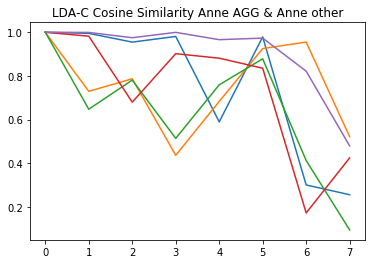

In [100]:
for i in range(5):
  anne_vectors_lda, characters_as_vectors_lda = train_lda()
  d = cosine_lda(anne_vectors_lda)
  plt.plot(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
  plt.title("LDA-C Cosine Similarity Anne AGG & Anne other")
plt.show()

In [101]:
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.999157,0.974922,0.999463,0.965941,0.973143,0.821951,0.027932,0.931612
"((1, Anne Shirley), count:488)",0.999157,1.000000,0.981385,0.998526,0.973953,0.980436,0.840312,0.057630,0.934445
"((2, Anne Shirley), count:454)",0.974922,0.981385,1.000000,0.969605,0.999203,0.999660,0.928031,0.231503,0.927928
"((3, Anne Shirley), count:243)",0.999463,0.998526,0.969605,1.000000,0.960228,0.968310,0.809668,0.007826,0.929672
"((4, Anne Shirley), count:365)",0.965941,0.973953,0.999203,0.960228,1.000000,0.999480,0.941272,0.263898,0.923728
"((5, Anne Cordelia), count:211)",0.973143,0.980436,0.999660,0.968310,0.999480,1.000000,0.930561,0.236881,0.927853
"((6, Anne dearie), count:42)",0.821951,0.840312,0.928031,0.809668,0.941272,0.930561,1.000000,0.545334,0.816589
"((7, Anne dearie), count:10)",0.027932,0.057630,0.231503,0.007826,0.263898,0.236881,0.545334,1.000000,0.107241
"((7, Mrs. Blythe), count:42)",0.931612,0.934445,0.927928,0.929672,0.923728,0.927853,0.816589,0.107241,1.000000


In [0]:
#Evaluating Doc2Vec 
#reading human-annotated character relation annotations
char_rel_frame = pd.read_csv(direc+"character_relation_annotations.txt", sep = "\t")
char_rel_frame = char_rel_frame[char_rel_frame["title"]=="Anne of Green Gables"]
char_rel_frame  = char_rel_frame[char_rel_frame["annotator"]=="annotator_11"]

In [103]:
#d2v
coarse = char_rel_frame["coarse_category"].unique()
affinity = char_rel_frame["affinity"].unique()
fine = char_rel_frame["fine_category"].unique()
change = char_rel_frame["change"].unique()

criteria = [coarse, affinity, fine, change]
col = ["coarse_category", "affinity", "fine_category", "change"]

for n in range(4):
  for c in criteria[n]:
    print(c)
    for i in range(len(char_rel_frame[char_rel_frame[col[n]]==c])):
      c1 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"].split()[0]], 0)
      c2 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"].split()[0]], 0)
      if c1.shape==(1, 300) and c2.shape==(1, 300):
        print(char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], cosine(c1, c2))

familial
Matthew Cuthbert Marilla Cuthbert [[0.9954386]]
Anne Shirley Matthew Cuthbert [[0.9752815]]
Anne Shirley Marilla Cuthbert [[0.97201556]]
Mrs. Barry Diana Barry [[0.9983894]]
social
Diana Barry Anne Shirley [[0.9294147]]
Mrs. Rachel Lynde Marilla Cuthbert [[0.9793625]]
Gilbert Blythe Anne Shirley [[0.93104804]]
Josie Pye Anne Shirley [[0.89045674]]
professional
Miss Muriel Stacy Anne Shirley [[0.94448817]]
Mr. Phillips Anne Shirley [[0.880561]]
positive
Matthew Cuthbert Marilla Cuthbert [[0.9954386]]
Anne Shirley Matthew Cuthbert [[0.9752815]]
Anne Shirley Marilla Cuthbert [[0.97201556]]
Diana Barry Anne Shirley [[0.9294147]]
Miss Muriel Stacy Anne Shirley [[0.94448817]]
Mrs. Barry Diana Barry [[0.9983894]]
neutral
Mrs. Rachel Lynde Marilla Cuthbert [[0.9793625]]
negative
Gilbert Blythe Anne Shirley [[0.93104804]]
Josie Pye Anne Shirley [[0.89045674]]
Mr. Phillips Anne Shirley [[0.880561]]
brother/sister
Matthew Cuthbert Marilla Cuthbert [[0.9954386]]
orphan
Anne Shirley Matthe

In [104]:
#lda
coarse = char_rel_frame["coarse_category"].unique()
affinity = char_rel_frame["affinity"].unique()
fine = char_rel_frame["fine_category"].unique()
change = char_rel_frame["change"].unique()

criteria = [coarse, affinity, fine, change]
col = ["coarse_category", "affinity", "fine_category", "change"]

for n in range(4):
  for c in criteria[n]:
    print(c)
    for i in range(len(char_rel_frame[char_rel_frame[col[n]]==c])):
      c1 = find_vector_for_character(characters_as_vectors_lda, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"].split()[0]], 0)
      c2 = find_vector_for_character(characters_as_vectors_lda, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"].split()[0]], 0)
      if c1.shape==(1, 50) and c2.shape==(1, 50):
        print(char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], cosine(c1, c2))

familial
Matthew Cuthbert Marilla Cuthbert [[0.99732333]]
Anne Shirley Matthew Cuthbert [[0.98646486]]
Anne Shirley Marilla Cuthbert [[0.9939342]]
Mrs. Barry Diana Barry [[0.557411]]
social
Diana Barry Anne Shirley [[0.9935997]]
Mrs. Rachel Lynde Marilla Cuthbert [[0.50268805]]
Gilbert Blythe Anne Shirley [[0.00077773]]
Josie Pye Anne Shirley [[0.00012507]]
professional
Miss Muriel Stacy Anne Shirley [[0.03114336]]
Mr. Phillips Anne Shirley [[0.17410369]]
positive
Matthew Cuthbert Marilla Cuthbert [[0.99732333]]
Anne Shirley Matthew Cuthbert [[0.98646486]]
Anne Shirley Marilla Cuthbert [[0.9939342]]
Diana Barry Anne Shirley [[0.9935997]]
Miss Muriel Stacy Anne Shirley [[0.03114336]]
Mrs. Barry Diana Barry [[0.557411]]
neutral
Mrs. Rachel Lynde Marilla Cuthbert [[0.50268805]]
negative
Gilbert Blythe Anne Shirley [[0.00077773]]
Josie Pye Anne Shirley [[0.00012507]]
Mr. Phillips Anne Shirley [[0.17410369]]
brother/sister
Matthew Cuthbert Marilla Cuthbert [[0.99732333]]
orphan
Anne Shirley

In [0]:
# find_vector_for_character(characters_as_vectors_lda, ['Anne Shirley', 'Anne'])

In [0]:
# #using a frequentist approach to show that each character is statistically 
# #different from the "mean"

# true_samps_d2v = []
# shuff_samps_d2v = []
# true_samps_lda = []
# shuff_samps_lda = []

# n = 5
# for i in range(n):
#   anne_vectors, characters_as_vectors = train_doc2vec()
#   anne_vectors_lda, characters_as_vectors_lda = train_lda()
#   anne_vectors_samp, characters_as_vectors_samp = train_doc2vec(randomise=True)
#   anne_vectors_lda_samp, characters_as_vectors_lda_samp = train_lda(randomise=True)
#   true_samps_d2v.append(cosine_d2v(anne_vectors))
#   shuff_samps_d2v.append(cosine_d2v(anne_vectors_samp))
#   true_samps_lda.append(cosine_lda(anne_vectors_lda))
#   shuff_samps_lda.append(cosine_lda(anne_vectors_lda_samp))

In [0]:
# true_samps_d2v[0]

In [0]:
# from scipy.stats import ttest_ind
# samples_true = np.zeros(shape=(n, len(np.array(true_samps_d2v[0]).flatten())))
# samples_shuff = np.zeros(shape=(n, len(np.array(true_samps_d2v[0]).flatten())))
# for i in range(len(true_samps_d2v)):
#   t = np.array(true_samps_d2v[i]).flatten()
#   f = np.array(shuff_samps_d2v[i]).flatten()
#   for e in range(len(t)):
#     samples_true[i][e] = t[e]
#     samples_shuff[i][e] = f[e]

# p_vals = []
# for k in range(len(np.array(true_samps_d2v[0]).flatten())):
#   p_vals.append(ttest_ind(samples_true[:,k], samples_shuff[:,k])[1])



In [0]:
# plt.hist(p_vals, bins=81)

In [0]:
# from scipy.stats import ttest_ind

# true_samps_d2v_flat = np.array(true_samps_d2v).flatten()
# shuff_samps_d2v = np.array(true_samps_d2v).flatten()
# true_samps_lda = []
# shuff_samps_lda = []

In [0]:
#conducting experiments based on hypotheses stated in paper
#testing hypothesis 1
from scipy.stats import ttest_ind
def test_hyp(c1_str, c2_str, model_name, book, n = 50):
  #using a frequentist approach to show that each character is statistically 
  #different from the "mean"
  true_samps = []
  shuff_samps = []
  for i in range(n):
    anne_vectors, characters_as_vectors = model_name()
    anne_vectors_samp, characters_as_vectors_samp = model_name(randomise=True)
    c1 = find_vector_for_character(characters_as_vectors, [c1_str, c1_str.split()[0]], book=book)
    c2 = find_vector_for_character(characters_as_vectors, [c2_str, c2_str.split()[0]], book=book)
    c1_samp = find_vector_for_character(characters_as_vectors_samp, [c1_str, c1_str.split()[0]], book=book)
    c2_samp = find_vector_for_character(characters_as_vectors_samp, [c2_str, c2_str.split()[0]], book=book)
    true_samps.append(cosine(c1, c2))
    shuff_samps.append(cosine(c1_samp, c2_samp))
  # samples_true = np.zeros(shape=(n, len(np.array(true_samps[0]).flatten())))
  # samples_shuff = np.zeros(shape=(n, len(np.array(shuff_samps[0]).flatten())))
  # for i in range(len(true_samps_d2v)):
  #   t = np.array(true_samps_d2v[i]).flatten()
  #   f = np.array(shuff_samps_d2v[i]).flatten()
  #   for e in range(len(t)):
  #     samples_true[i][e] = t[e]
  #     samples_shuff[i][e] = f[e]

  return ttest_ind(true_samps, shuff_samps), np.mean(true_samps)




In [112]:
#hyp1 lda
print("lda0")
print(test_hyp("Anne Shirley", "Diana Barry", train_lda, 0))
print("lda4")
print(test_hyp("Anne Shirley", "Cornelia Bryant", train_lda, 4))

#hyp1 character2vec
print("c2v0")
print(test_hyp("Anne Shirley", "Diana Barry", train_doc2vec, 0))
print("c2v4")
print(test_hyp("Anne Shirley", "Cornelia Bryant", train_doc2vec, 4))

lda0
(Ttest_indResult(statistic=array([[12.594992]], dtype=float32), pvalue=array([[3.31689798e-22]])), 0.9428144)
lda4
(Ttest_indResult(statistic=array([[15.042396]], dtype=float32), pvalue=array([[3.28777361e-27]])), 0.91722417)
c2v0
(Ttest_indResult(statistic=array([[-2.112441]], dtype=float32), pvalue=array([[0.03719047]])), 0.923666)
c2v4
(Ttest_indResult(statistic=array([[-7.974868]], dtype=float32), pvalue=array([[2.8701453e-12]])), 0.9776365)


In [0]:
# #hyp2 lda
print("lda1")
print(test_hyp("Anne Shirley", "Davy", train_lda, 1))
print("lda5")
print(test_hyp("Anne Shirley", "Jem", train_lda, 5))
print("lda6")
print(test_hyp("Anne Shirley", "Jem", train_lda, 6))

#hyp2 character2vec
print("c2v1")
print(test_hyp("Anne Shirley", "Davy", train_doc2vec, 1))
print("c2v5")
print(test_hyp("Anne Shirley", "Jem", train_doc2vec, 5))
print("c2v6")
print(test_hyp("Anne Shirley", "Jem", train_doc2vec, 6))

lda1
